In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
# Import that data from the shape file that we started with

shp_file = '/Users/rebeccawagner/Documents/GitHub/GerryGainMCMC/Data/State Shp Files/AL/Alabama_VTD_District_Intersection.shp'

original_data = gpd.read_file(shp_file)

original_data.head()

,OBJECTID,Join_Count,TARGET_FID,cd_117,VTD,vtd_cd_117,dups,total,one_race,wht_1,...,last,first,middle,race,res_ad_lat,res_ad_lon,incumbent,Shape_Le_1,Shape_Area,geometry
0,1,0,0,01001,01003000001,01003000001_01001,0,357,334,256,...,None,None,None,None,0.0,0.0,0,1.004504,0.024391,"POLYGON ((-87.76515 31.29735, -87.76360 31.297..."
1,2,0,1,01001,01003000002,01003000002_01001,0,251,242,98,...,None,None,None,None,0.0,0.0,0,1.012120,0.022135,"POLYGON ((-87.81299 31.13709, -87.81653 31.131..."
2,3,0,2,01001,01003000003,01003000003_01001,0,558,538,260,...,None,None,None,None,0.0,0.0,0,0.597227,0.010159,"POLYGON ((-87.90042 30.93770, -87.90144 30.937..."
3,4,0,3,01001,01003000004,01003000004_01001,0,1175,1119,821,...,None,None,None,None,0.0,0.0,0,0.641053,0.012414,"POLYGON ((-87.92361 30.93146, -87.92348 30.931..."
4,5,0,4,01001,01003000005,01003000005_01001,0,1632,1578,401,...,None,None,None,None,0.0,0.0,0,0.188839,0.000877,"POLYGON ((-87.77521 30.83709, -87.77556 30.837..."


In [13]:
original_data['county']

0       01003
1       01003
2       01003
3       01003
4       01003
        ...  
1839    01131
1840    01131
1841    01131
1842    01131
1843    01131
Name: county, Length: 1844, dtype: object

In [42]:
# there are no duplicate vtds in the original data

original_data[original_data['vtd_cd_117'].duplicated()]

,OBJECTID,Join_Count,TARGET_FID,cd_117,VTD,vtd_cd_117,dups,total,one_race,wht_1,...,last,first,middle,race,res_ad_lat,res_ad_lon,incumbent,Shape_Le_1,Shape_Area,geometry


In [48]:
# If we strip the last character in the column vtd_cd_117, there are 7 duplicates.
original_data['vtd_cd_117'] = [x[:-1] for x in original_data['vtd_cd_117']]

In [49]:
original_data[original_data['vtd_cd_117'].duplicated()]

,OBJECTID,Join_Count,TARGET_FID,cd_117,VTD,vtd_cd_117,dups,total,one_race,wht_1,...,last,first,middle,race,res_ad_lat,res_ad_lon,incumbent,Shape_Le_1,Shape_Area,geometry
425,426,0,425,01002,01053000120,01053000120_0100,1,482,453,290,...,None,None,None,None,0.0000,0.0000,0,0.766593,0.013258,"POLYGON ((-86.76754 31.26133, -86.76396 31.261..."
1185,1186,0,1185,01005,01077000007,01077000007_0100,1,2577,2476,2405,...,None,None,None,None,0.0000,0.0000,0,0.349473,0.002822,"POLYGON ((-87.49961 34.89664, -87.49961 34.896..."
1352,1353,0,1352,01006,01021000120,01021000120_0100,1,264,241,231,...,None,None,None,None,0.0000,0.0000,0,0.226322,0.001573,"POLYGON ((-86.61513 32.93159, -86.61512 32.931..."
1637,1638,0,1637,01007,01073002180,01073002180_0100,1,271,257,176,...,None,None,None,None,0.0000,0.0000,0,0.082098,0.000191,"POLYGON ((-86.77322 33.52278, -86.77601 33.521..."
1675,1676,1,1675,01007,01073003210,01073003210_0100,1,2128,2015,986,...,sewell,terri,a,b,33.3479,-86.8825,1,0.088335,0.000216,"POLYGON ((-86.87576 33.35386, -86.87628 33.352..."
1718,1719,0,1718,01007,01101000104,01101000104_0100,1,816,802,138,...,None,None,None,None,0.0000,0.0000,0,0.037554,0.000073,"POLYGON ((-86.25407 32.32715, -86.25477 32.327..."
1782,1783,0,1782,01007,01125000020,01125000020_0100,1,5681,5455,3128,...,None,None,None,None,0.0000,0.0000,0,0.196879,0.001423,"POLYGON ((-87.61332 33.26925, -87.61329 33.269..."


In [21]:
# the same thing happens if we strip all 6 of the last characters

original_data['vtd_cd_117'] = [x[:-6] for x in original_data['vtd_cd_117']]

In [24]:
original_data[original_data['vtd_cd_117'].duplicated()]

,OBJECTID,Join_Count,TARGET_FID,cd_117,VTD,vtd_cd_117,dups,total,one_race,wht_1,...,last,first,middle,race,res_ad_lat,res_ad_lon,incumbent,Shape_Le_1,Shape_Area,geometry
425,426,0,425,01002,01053000120,01053000120,1,482,453,290,...,None,None,None,None,0.0000,0.0000,0,0.766593,0.013258,"POLYGON ((-86.76754 31.26133, -86.76396 31.261..."
1185,1186,0,1185,01005,01077000007,01077000007,1,2577,2476,2405,...,None,None,None,None,0.0000,0.0000,0,0.349473,0.002822,"POLYGON ((-87.49961 34.89664, -87.49961 34.896..."
1352,1353,0,1352,01006,01021000120,01021000120,1,264,241,231,...,None,None,None,None,0.0000,0.0000,0,0.226322,0.001573,"POLYGON ((-86.61513 32.93159, -86.61512 32.931..."
1637,1638,0,1637,01007,01073002180,01073002180,1,271,257,176,...,None,None,None,None,0.0000,0.0000,0,0.082098,0.000191,"POLYGON ((-86.77322 33.52278, -86.77601 33.521..."
1675,1676,1,1675,01007,01073003210,01073003210,1,2128,2015,986,...,sewell,terri,a,b,33.3479,-86.8825,1,0.088335,0.000216,"POLYGON ((-86.87576 33.35386, -86.87628 33.352..."
1718,1719,0,1718,01007,01101000104,01101000104,1,816,802,138,...,None,None,None,None,0.0000,0.0000,0,0.037554,0.000073,"POLYGON ((-86.25407 32.32715, -86.25477 32.327..."
1782,1783,0,1782,01007,01125000020,01125000020,1,5681,5455,3128,...,None,None,None,None,0.0000,0.0000,0,0.196879,0.001423,"POLYGON ((-87.61332 33.26925, -87.61329 33.269..."


In [31]:
# or if we look at the VTD column that doesn't include original district

original_data[original_data['VTD'].duplicated()]

,OBJECTID,Join_Count,TARGET_FID,cd_117,VTD,vtd_cd_117,dups,total,one_race,wht_1,...,last,first,middle,race,res_ad_lat,res_ad_lon,incumbent,Shape_Le_1,Shape_Area,geometry
425,426,0,425,01002,01053000120,01053000120_01002,1,482,453,290,...,None,None,None,None,0.0000,0.0000,0,0.766593,0.013258,"POLYGON ((-86.76754 31.26133, -86.76396 31.261..."
1185,1186,0,1185,01005,01077000007,01077000007_01005,1,2577,2476,2405,...,None,None,None,None,0.0000,0.0000,0,0.349473,0.002822,"POLYGON ((-87.49961 34.89664, -87.49961 34.896..."
1352,1353,0,1352,01006,01021000120,01021000120_01006,1,264,241,231,...,None,None,None,None,0.0000,0.0000,0,0.226322,0.001573,"POLYGON ((-86.61513 32.93159, -86.61512 32.931..."
1637,1638,0,1637,01007,01073002180,01073002180_01007,1,271,257,176,...,None,None,None,None,0.0000,0.0000,0,0.082098,0.000191,"POLYGON ((-86.77322 33.52278, -86.77601 33.521..."
1675,1676,1,1675,01007,01073003210,01073003210_01007,1,2128,2015,986,...,sewell,terri,a,b,33.3479,-86.8825,1,0.088335,0.000216,"POLYGON ((-86.87576 33.35386, -86.87628 33.352..."
1718,1719,0,1718,01007,01101000104,01101000104_01007,1,816,802,138,...,None,None,None,None,0.0000,0.0000,0,0.037554,0.000073,"POLYGON ((-86.25407 32.32715, -86.25477 32.327..."
1782,1783,0,1782,01007,01125000020,01125000020_01007,1,5681,5455,3128,...,None,None,None,None,0.0000,0.0000,0,0.196879,0.001423,"POLYGON ((-87.61332 33.26925, -87.61329 33.269..."


In [3]:
# looking at a specific duplicate instance... 

duplicate_rows = original_data[original_data['VTD'].duplicated()]['VTD']
duplicate_rows

425     01053000120
1185    01077000007
1352    01021000120
1637    01073002180
1675    01073003210
1718    01101000104
1782    01125000020
Name: VTD, dtype: object

In [53]:
# reset the original data (bad coding IK)
original_data = gpd.read_file(shp_file)

In [8]:
original_data[original_data['VTD'] == duplicate_rows[1352]]

,OBJECTID,Join_Count,TARGET_FID,cd_117,VTD,vtd_cd_117,dups,total,one_race,wht_1,...,last,first,middle,race,res_ad_lat,res_ad_lon,incumbent,Shape_Le_1,Shape_Area,geometry
610,611,0,610,01003,01021000120,01021000120_01003,0,1378,1335,1274,...,None,None,None,None,0.0,0.0,0,0.783201,0.011899,"MULTIPOLYGON (((-86.51734 33.02057, -86.51743 ..."
1352,1353,0,1352,01006,01021000120,01021000120_01006,1,264,241,231,...,None,None,None,None,0.0,0.0,0,0.226322,0.001573,"POLYGON ((-86.61513 32.93159, -86.61512 32.931..."


<AxesSubplot: >

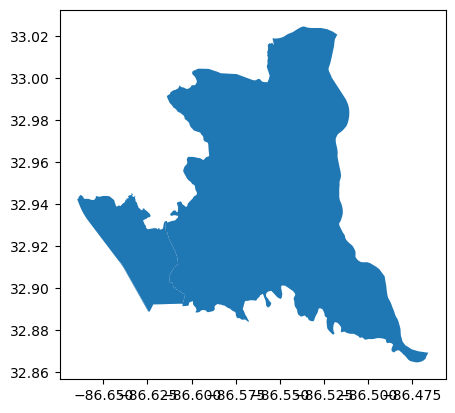

In [10]:
original_data[original_data['VTD'] == duplicate_rows[1352]].plot()

In [ ]:
# these are two different vtds... 

In [58]:
# looking at it in an output file 

# this is the very first 2000 iterations 
output_1 = pd.read_csv('/Users/rebeccawagner/Documents/GitHub/GerryGainMCMC/Output/Chain_02.23/used/RunOne_assignments_1_2023-03-01-14-58-44-965042')

In [62]:
output_1['Iteration'] = [x[:-6] for x in output_1['Iteration']]

In [66]:
# same exact duplicated rows

output_1[output_1["Iteration"].duplicated()]

,Iteration,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
425,01053000120,1002,1002,1003,1002,1003,1003,1003,1003,1003,...,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007
1185,01077000007,1005,1005,1005,1005,1005,1005,1005,1005,1005,...,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001
1352,01021000120,1006,1006,1006,1006,1006,1006,1006,1006,1006,...,1005,1005,1005,1002,1002,1002,1002,1002,1002,1002
1637,01073002180,1007,1001,1001,1001,1001,1001,1001,1001,1001,...,1002,1002,1002,1005,1005,1005,1005,1005,1005,1005
1675,01073003210,1007,1001,1001,1001,1001,1001,1006,1006,1006,...,1005,1005,1005,1005,1005,1005,1002,1002,1002,1002
1718,01101000104,1007,1001,1001,1001,1001,1001,1006,1006,1006,...,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006
1782,01125000020,1007,1001,1001,1001,1001,1001,1006,1006,1006,...,1005,1005,1005,1002,1002,1002,1002,1002,1002,1002


In [13]:
# looking at some random file... this is how i was loading into the database

from glob import glob

PATH = '../Output/Chain_02.23/next/'
PATH_2 = '../Output/Chain_02.23/used/'

files = glob(PATH + '*') + glob(PATH_2 + '*')

In [71]:
output_x = pd.read_csv(files[0])

In [72]:
output_x['Iteration'] = [x[:-6] for x in output_x['Iteration']]

In [73]:
# and again the same rows are duplicated... 
output_x['Iteration'][output_x['Iteration'].duplicated()]

425     01053000120
1185    01077000007
1352    01021000120
1637    01073002180
1675    01073003210
1718    01101000104
1782    01125000020
Name: Iteration, dtype: object

In [1]:
# ok lets see what the database says

import gerry_v2 as gerry

from importlib import reload; reload(gerry);


In [3]:
g = gerry.GerryDB()

In [4]:
g.CreatePlanTable()

In [5]:
g.CreateScoresTable()

In [7]:
g.CreateVTDTable()

In [11]:
# function for preparing an output file to load into database

def prep(file):

    seed = file.split('_')[3]

    data = pd.read_csv(file)
    data['Iteration'] = [x[:-6] for x in data['Iteration']]
    data.rename(columns={'Iteration':'vtd'}, inplace=True)

    data_m = data.melt(id_vars='vtd',var_name='iter',value_name='dist')
    data_m["plan_id"] = seed + '_' + data_m["iter"]

    return(data_m)

In [23]:
# melting the data gives 1844 vtds * 2000 iterations = 3,688,000
ex = prep(files[0])
ex

,vtd,iter,dist,plan_id
0,01003000001,1,1003,1.2.5.8.19.39.124.177.414.736_1
1,01003000002,1,1003,1.2.5.8.19.39.124.177.414.736_1
2,01003000003,1,1003,1.2.5.8.19.39.124.177.414.736_1
3,01003000004,1,1003,1.2.5.8.19.39.124.177.414.736_1
4,01003000005,1,1003,1.2.5.8.19.39.124.177.414.736_1
...,...,...,...,...
3687995,01131005006,2000,1005,1.2.5.8.19.39.124.177.414.736_2000
3687996,01131006001,2000,1005,1.2.5.8.19.39.124.177.414.736_2000
3687997,01131006002,2000,1005,1.2.5.8.19.39.124.177.414.736_2000
3687998,01131006004,2000,1005,1.2.5.8.19.39.124.177.414.736_2000


In [32]:
# I'm not 100% sure how we end up with 13,228 rows here. if there are 7 duplicate rows, that should melt to 7 * 2000 = 14,000 ?
# theres 772 rows im not accounting for

ex[ex.duplicated()]['vtd']

425        01053000120
1185       01077000007
1352       01021000120
1637       01073002180
1675       01073003210
              ...     
3687508    01021000120
3687793    01073002180
3687831    01073003210
3687874    01101000104
3687938    01125000020
Name: vtd, Length: 13228, dtype: object

In [33]:
# but it still says we only have 7 vtds
len(ex[ex.duplicated()]['vtd'].unique())

7

In [34]:
# I'll try loading the file into the database but we'll get uniquenes errors on the primary key (vtd and iter)
# because of the duplicate vtds

sql = "INSERT INTO tPlan" + " (" + \
           ",".join([c for c in ex.columns]) + \
           ") VALUES (" + ",".join([':' + c for c in ex.columns]) + ");"

g.Connect()

for row in ex.to_dict(orient='records'):
        try:
            g.curs.execute(sql,row)
        except Exception as e:
            print(e)
            print(row)

g.conn.commit()
g.conn.close()

UNIQUE constraint failed: tPlan.vtd, tPlan.iter
{'vtd': '01053000120', 'iter': '1', 'dist': 1005, 'plan_id': '1.2.5.8.19.39.124.177.414.736_1'}
UNIQUE constraint failed: tPlan.vtd, tPlan.iter
{'vtd': '01077000007', 'iter': '1', 'dist': 1002, 'plan_id': '1.2.5.8.19.39.124.177.414.736_1'}
UNIQUE constraint failed: tPlan.vtd, tPlan.iter
{'vtd': '01021000120', 'iter': '1', 'dist': 1007, 'plan_id': '1.2.5.8.19.39.124.177.414.736_1'}
UNIQUE constraint failed: tPlan.vtd, tPlan.iter
{'vtd': '01073002180', 'iter': '1', 'dist': 1004, 'plan_id': '1.2.5.8.19.39.124.177.414.736_1'}
UNIQUE constraint failed: tPlan.vtd, tPlan.iter
{'vtd': '01073003210', 'iter': '1', 'dist': 1004, 'plan_id': '1.2.5.8.19.39.124.177.414.736_1'}
UNIQUE constraint failed: tPlan.vtd, tPlan.iter
{'vtd': '01101000104', 'iter': '1', 'dist': 1007, 'plan_id': '1.2.5.8.19.39.124.177.414.736_1'}
UNIQUE constraint failed: tPlan.vtd, tPlan.iter
{'vtd': '01125000020', 'iter': '1', 'dist': 1002, 'plan_id': '1.2.5.8.19.39.124.177.414.

In [35]:
g.RunQuery("SELECT * FROM tPlan;")

,plan_id,vtd,iter,dist
0,1.2.5.8.19.39.124.177.414.736_1,01003000001,1,1003
1,1.2.5.8.19.39.124.177.414.736_1,01003000002,1,1003
2,1.2.5.8.19.39.124.177.414.736_1,01003000003,1,1003
3,1.2.5.8.19.39.124.177.414.736_1,01003000004,1,1003
4,1.2.5.8.19.39.124.177.414.736_1,01003000005,1,1003
...,...,...,...,...
3673995,1.2.5.8.19.39.124.177.414.736_2000,01131005006,2000,1005
3673996,1.2.5.8.19.39.124.177.414.736_2000,01131006001,2000,1005
3673997,1.2.5.8.19.39.124.177.414.736_2000,01131006002,2000,1005
3673998,1.2.5.8.19.39.124.177.414.736_2000,01131006004,2000,1005


In [ ]:
# again, I'm not sure how we end up with 3,674,000 rows. If we start with 3,688,000 and 13,228 are duplicate rows
# I thought 6,364,772 should load. Somewhere theres 772 entries I'm not accounting for (same as above).